In [71]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import shapefile as shp
%matplotlib inline


plt.style.use('ggplot')

In [72]:
public_trans_full16 = pd.read_csv('../data/2016_metrics.csv')
public_trans_full16.head(5)

,Name,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
0,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",HR,...,NaN,"347,091,534",NaN,No,NaN,NaN,NaN,Hide questionable data tags,NaN,NaN
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",MB,...,NaN,"86,863,364",NaN,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN
2,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",DR,...,NaN,"48,814,480",NaN,No,NaN,2.0,NaN,1,NaN,2.0
3,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",CB,...,NaN,"9,214,967",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",RB,...,NaN,"2,988,560",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
public_trans_full16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 45 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Name                                                                     3685 non-null   object 
 1   City                                                                     3685 non-null   object 
 2   State                                                                    3685 non-null   object 
 3   Legacy NTD ID                                                            3470 non-null   object 
 4   NTD ID                                                                   3685 non-null   object 
 5   Organization Type                                                        3685 non-null   object 
 6   Reporter Type                                                           

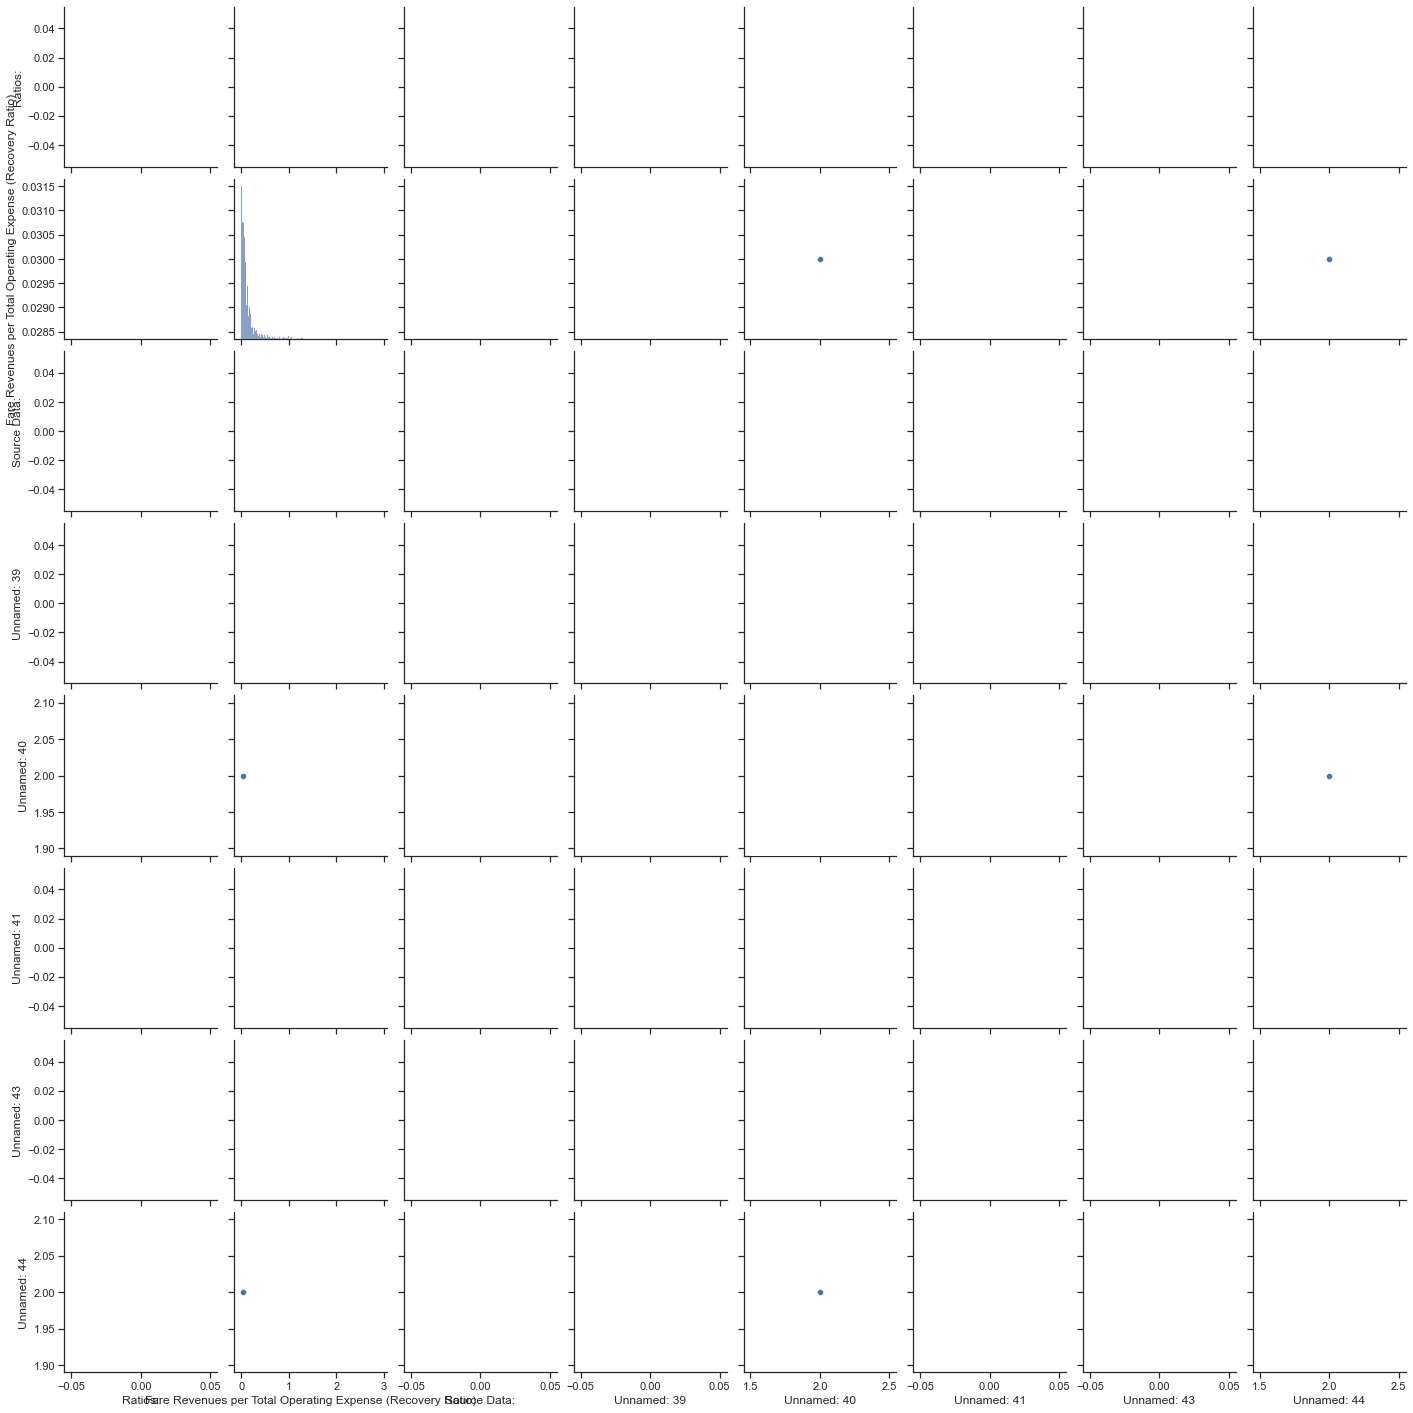

In [74]:
sns.set_theme(style='ticks')
sns.pairplot(public_trans_full16)

In [75]:
# # public_trans16_modes['Mode'] = public_trans16['Mode'].groupby(by=['RB', 'CB', 'MB', 'CR' ])
# public_trans16_mode = public_trans16.groupby(['RB'])

filtered_test_df = public_trans_full16[public_trans_full16['Mode'].isin(['CR', 'CB', 'RB', 'MB'])]
filtered_test_df.head(5)

,Name,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",MB,...,NaN,"86,863,364",NaN,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN
3,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",CB,...,NaN,"9,214,967",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",RB,...,NaN,"2,988,560",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
5,New Jersey Transit Corporation,Newark,NJ,2080,20080,Other Publicly-Owned or Privately Chartered Co...,Full Reporter,"18,351,295","4,056",MB,...,NaN,"72,451,012",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
6,New Jersey Transit Corporation,Newark,NJ,2080,20080,Other Publicly-Owned or Privately Chartered Co...,Full Reporter,"18,351,295","4,056",CR,...,NaN,"61,393,168",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
filtered_test_df = filtered_test_df.loc[filtered_test_df['State'] == 'NY']
filtered_test_df.head(5)

,Name,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
1,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",MB,...,NaN,"86,863,364",NaN,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN
3,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",CB,...,NaN,"9,214,967",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
4,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","11,004",RB,...,NaN,"2,988,560",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
89,"Metro-North Commuter Railroad Company, dba: MT...",New York,NY,2078,20078,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","1,175",CR,...,NaN,"69,580,238",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
90,"Metro-North Commuter Railroad Company, dba: MT...",New York,NY,2078,20078,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","1,175",MB,...,NaN,"157,793",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
city_county =pd.read_csv('../data/ny_city_county.csv')

In [81]:
public_trans_2016_with_county = filtered_test_df.merge(
    city_county,
    how='left',
    left_on='City',
    right_on='City'
)

<function matplotlib.pyplot.show(close=None, block=None)>

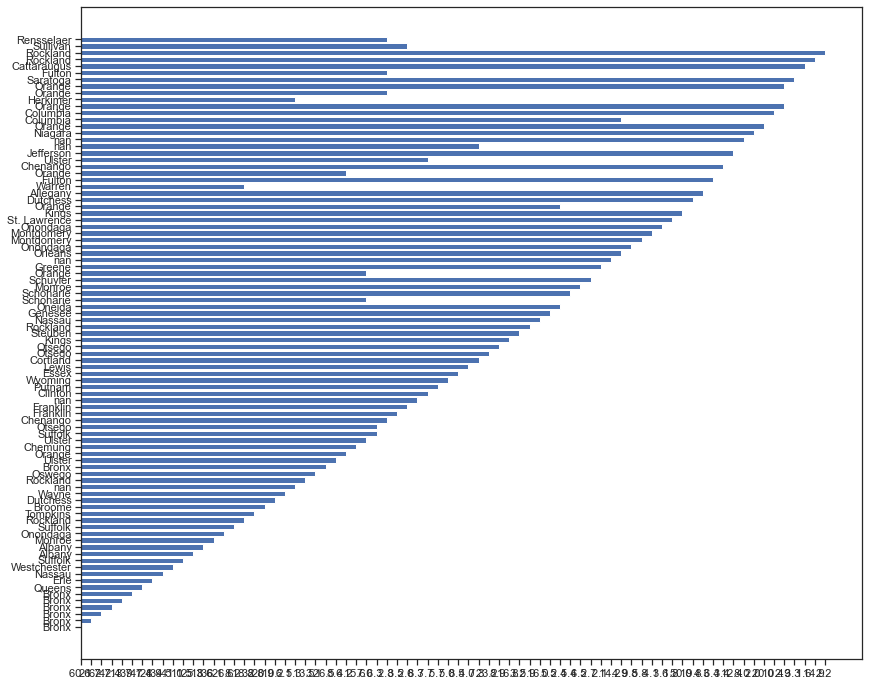

In [82]:
fig, ax = plt.subplots(facecolor='white', figsize=(14,12))
x = public_trans_2016_with_county['County']
y = public_trans_2016_with_county['Passengers per Hour']
y_pos = np.arange(len(x))

plt.barh(y_pos, y)
plt.yticks(y_pos, x)

plt.show